In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [135]:
df= pd.read_csv("HR_Data.csv")
df

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined
8995,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8996,11882,3664089,No,5,0,E2,20.00,10.00,-8.33,No,No,Male,Direct,8,ETS,Noida,34,Joined


Exploring the data

In [136]:
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


Changing columns name to proper name so that it will be easy for us in eda and model building

In [137]:
df= df.rename(columns={'Joining.Bonus':'JoiningBonus','Candidate.relocate.actual':'CandidatRelocateActual','Candidate.Source':'CandidateSource','Rex.in.Yrs':'RexInYrs','Candidate.Ref': 'CandidateRef', 'Duration.to.accept.offer': 'Durationtoacceptoffer','DOJ.Extended': 'DOJExtended', 'Notice.period': 'NoticePeriod','Offered.band':'OfferedBand','Pecent.hike.expected.in.CTC':'PecentHikeExpectedInCTC','Percent.hike.offered.in.CTC':'PercentHikeOfferedInCTC','Percent.difference.CTC':'PercentDifferenceCTC'})

In [138]:
df.tail()

,SLNO,CandidateRef,DOJExtended,Durationtoacceptoffer,NoticePeriod,OfferedBand,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,JoiningBonus,CandidatRelocateActual,Gender,CandidateSource,RexInYrs,LOB,Location,Age,Status
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined
8995,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8996,11882,3664089,No,5,0,E2,20.00,10.00,-8.33,No,No,Male,Direct,8,ETS,Noida,34,Joined
8997,5080,2556130,Yes,4,30,E1,30.95,23.81,-5.45,No,No,Male,Direct,4,ETS,Bangalore,26,Joined


In [139]:
df.shape

(8998, 18)

Counting the null values in the dataset .

In [140]:
df.isnull().sum()

SLNO                       0
CandidateRef               0
DOJExtended                0
Durationtoacceptoffer      0
NoticePeriod               0
OfferedBand                0
PecentHikeExpectedInCTC    0
PercentHikeOfferedInCTC    0
PercentDifferenceCTC       0
JoiningBonus               0
CandidatRelocateActual     0
Gender                     0
CandidateSource            0
RexInYrs                   0
LOB                        0
Location                   0
Age                        0
Status                     0
dtype: int64

so there is no any null value in our data

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SLNO                     8998 non-null   int64  
 1   CandidateRef             8998 non-null   int64  
 2   DOJExtended              8998 non-null   object 
 3   Durationtoacceptoffer    8998 non-null   int64  
 4   NoticePeriod             8998 non-null   int64  
 5   OfferedBand              8998 non-null   object 
 6   PecentHikeExpectedInCTC  8998 non-null   float64
 7   PercentHikeOfferedInCTC  8998 non-null   float64
 8   PercentDifferenceCTC     8998 non-null   float64
 9   JoiningBonus             8998 non-null   object 
 10  CandidatRelocateActual   8998 non-null   object 
 11  Gender                   8998 non-null   object 
 12  CandidateSource          8998 non-null   object 
 13  RexInYrs                 8998 non-null   int64  
 14  LOB                     

grouping  data by status 

In [142]:
left = df.groupby('Status')
left.mean()

,SLNO,CandidateRef,Durationtoacceptoffer,NoticePeriod,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,RexInYrs,Age
Status,,,,,,,,,
Joined,6012.823127,2.851244e+06,20.617687,37.233461,43.875838,41.147158,-1.263402,4.193002,30.004647
Not Joined,5795.761593,2.811505e+06,24.956599,48.192628,43.882818,38.588460,-2.929298,4.439358,29.517836


In [143]:
df.describe()

,SLNO,CandidateRef,Durationtoacceptoffer,NoticePeriod,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,RexInYrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


Chart on some numerical data .

C:\Users\17mur\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\17mur\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\17mur\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<AxesSubplot:xlabel='Gender', ylabel='count'>

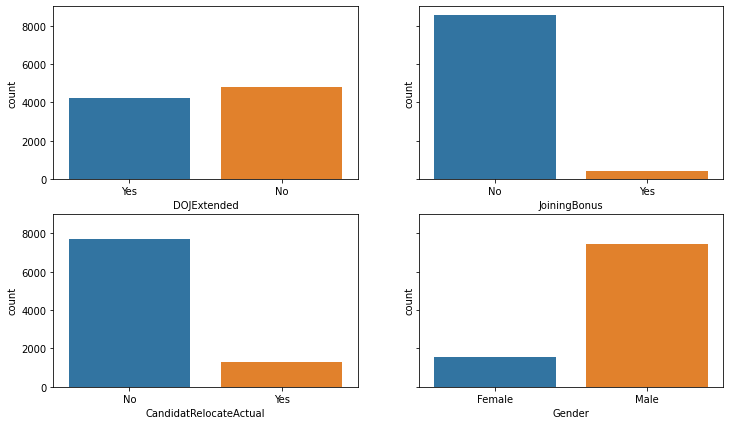

In [144]:
fig,axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)

sns.countplot("DOJExtended", data=df, ax=axes[0,0])
sns.countplot("JoiningBonus", data=df, ax=axes[0,1])
sns.countplot("CandidatRelocateActual", data=df, ax=axes[1,0])
sns.countplot("Gender", data=df, ax=axes[1,1])


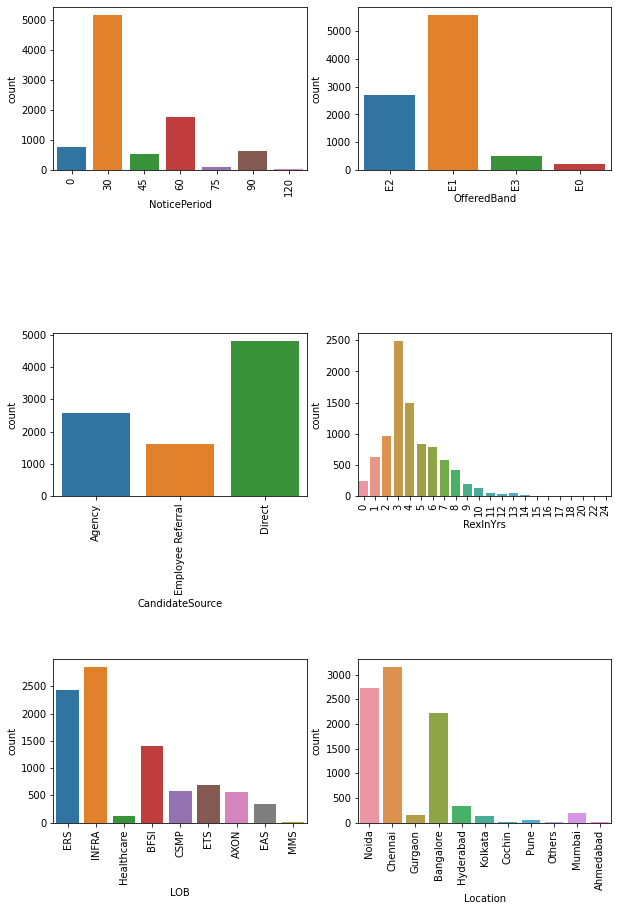

In [145]:
features=[ 'NoticePeriod',
 'OfferedBand',
 'CandidateSource',
 'RexInYrs',
 'LOB',
 'Location']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)


Employes joined or not


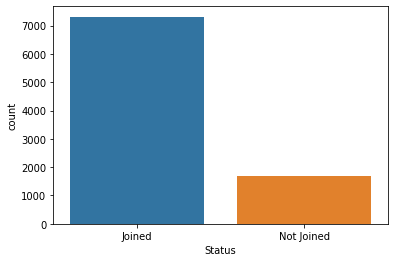

In [146]:
print("Employes joined or not")
sns.countplot(x=df.Status,data = df)
plt.show()

Gender wise Joined or Not joined Chart


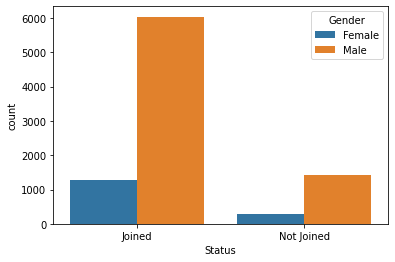

In [147]:
print("Gender wise Joined or Not joined Chart")
sns.countplot(x = "Status",data=df,hue="Gender")
plt.show()


From below code we will seperate our numerical data columns and Categorical Data Columns .

In [148]:
obj_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [149]:
print("numerical data columns ")
num_col

numerical data columns 


['SLNO',
 'CandidateRef',
 'Durationtoacceptoffer',
 'NoticePeriod',
 'PecentHikeExpectedInCTC',
 'PercentHikeOfferedInCTC',
 'PercentDifferenceCTC',
 'RexInYrs',
 'Age']

Now we will make Violin plots for all the numerical value . 

In [150]:
# Vilon plot
def TreatOutliners(col,df):
    ax = sns.violinplot(x=df[col])
    plt.show()

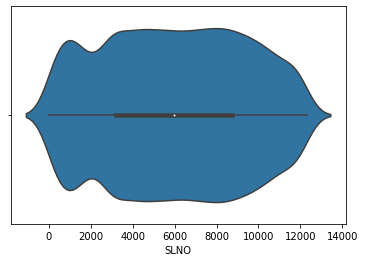

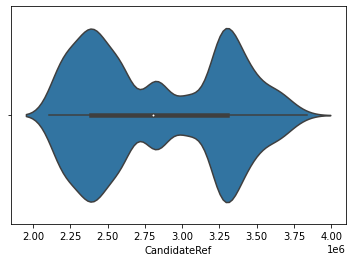

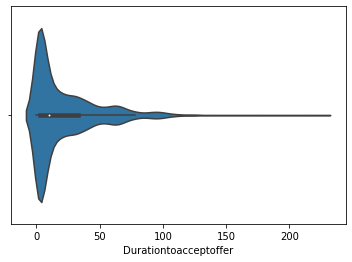

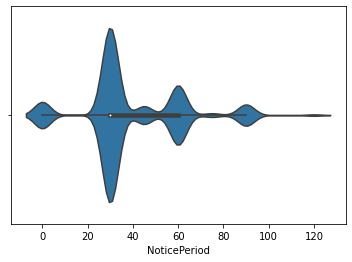

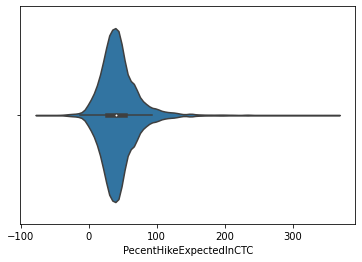

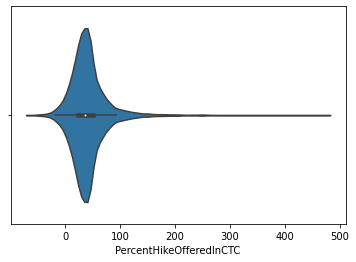

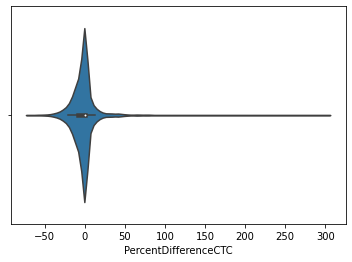

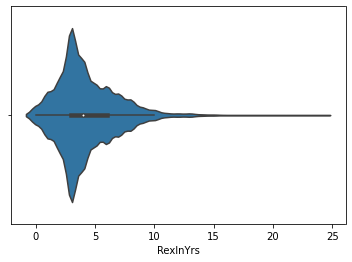

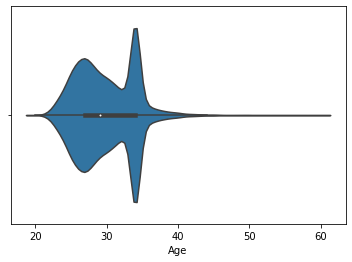

In [151]:
for i in num_col:
    TreatOutliners(i,df)

Here is boxplot 

In [152]:
def TreatOutliner(col,df):
    df.boxplot(column=[col])
    plt.show()
    

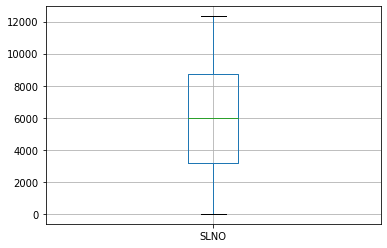

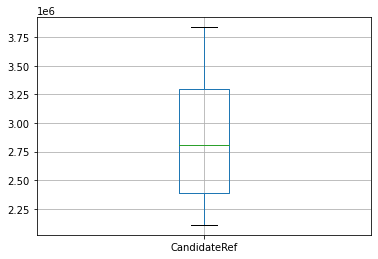

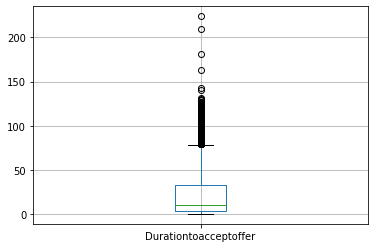

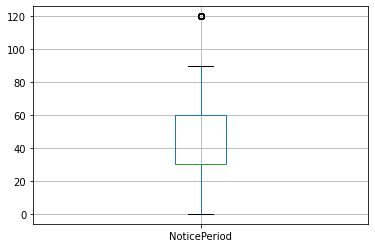

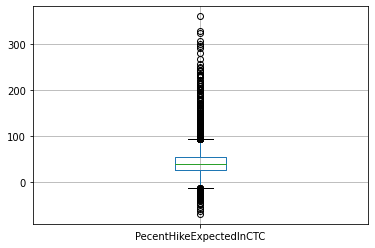

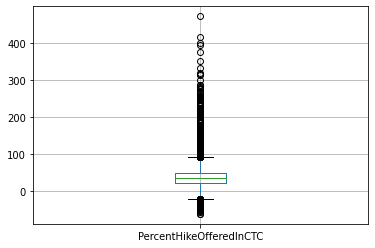

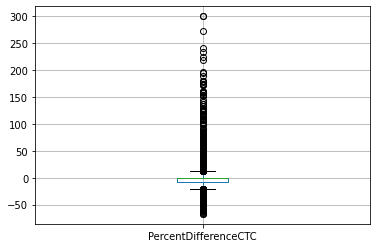

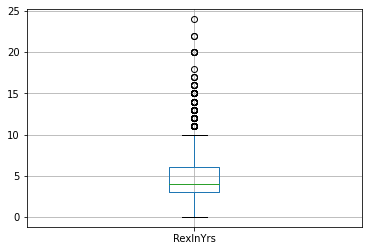

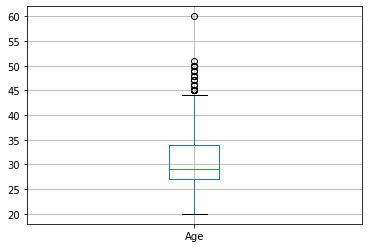

In [153]:
for i in num_col:
    TreatOutliner(i,df)

remove all ouliers for better prediction .

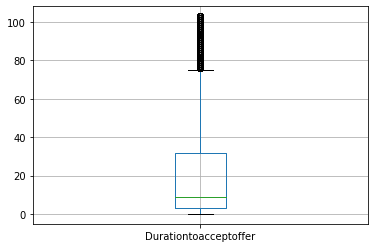

(8908, 18)


In [154]:
#taking care of Durationintoacceptoffer outliers .
per99 = np.percentile(df.Durationtoacceptoffer,[99])[0]
df = df[(df.Durationtoacceptoffer < per99)]
df.boxplot(column=['Durationtoacceptoffer'])
plt.show()
print(df.shape)

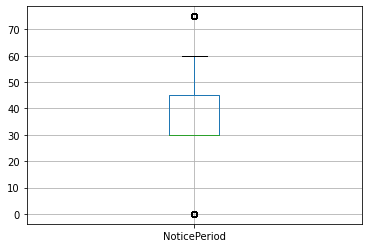

(8277, 18)


In [155]:
#taking care of NoticePeriod outliers 
UpperValue = np.percentile(df.NoticePeriod,[99])[0]
df = df[(df.NoticePeriod<UpperValue)]
df.boxplot(column=['NoticePeriod'])
plt.show()
print(df.shape)

In [156]:
lower_value = np.percentile(df.PecentHikeExpectedInCTC,[1])[0]
df = df[(df.PecentHikeExpectedInCTC>lower_value)]
upper_value = np.percentile(df.PecentHikeExpectedInCTC,[99])[0]
df= df[(df.PecentHikeExpectedInCTC < upper_value)]

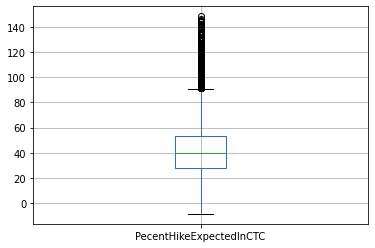

In [157]:
df.boxplot(column=['PecentHikeExpectedInCTC'])
plt.show()

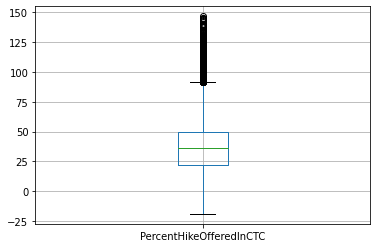

(7911, 18)


In [158]:
# taking care of .PercentHikeOfferedInCTC outliers 
upperValue = np.percentile(df.PercentHikeOfferedInCTC,[99])[0]
lowerValue = np.percentile(df.PercentHikeOfferedInCTC,[1])[0]
df= df[(df.PercentHikeOfferedInCTC <upperValue)]
df = df[(df.PercentHikeOfferedInCTC >lowerValue)]
df.boxplot(column=['PercentHikeOfferedInCTC'])
plt.show()
print(df.shape)

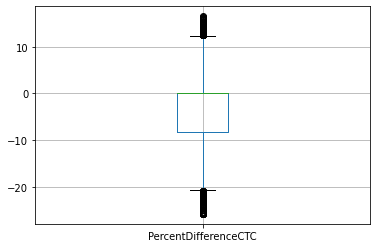

In [159]:
# taking care of .PercentDifferenceCTC outliers 
upperValue = np.percentile(df.PercentDifferenceCTC,[95])[0]
lowerValue = np.percentile(df.PercentDifferenceCTC,[3])[0]
df = df[(df.PercentDifferenceCTC <upperValue)]
df= df[(df.PercentDifferenceCTC >lowerValue)]
df.boxplot(column=['PercentDifferenceCTC'])
plt.show()

In [160]:
df.shape

(7265, 18)

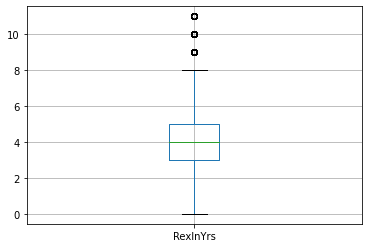

In [161]:
# taking care of RexInYrs outliers 
upperValue = np.percentile(df.RexInYrs,[99])[0]
df = df[(df.RexInYrs < upperValue)]
df.boxplot(column=['RexInYrs'])
plt.show()

After removing outlies let's see all the numerical information about our data .

In [162]:
df.describe()

,SLNO,CandidateRef,Durationtoacceptoffer,NoticePeriod,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,RexInYrs,Age
count,7159.000000,7.159000e+03,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000
mean,6116.694790,2.849291e+06,19.472552,35.412069,43.050930,37.544367,-3.580712,4.057410,29.797597
std,3326.615458,4.875150e+05,22.358544,17.120672,23.420478,22.837758,7.705324,2.228226,3.974452
min,3.000000,2.109941e+06,0.000000,0.000000,-8.330000,-18.750000,-25.830000,0.000000,20.000000
25%,3341.500000,2.386538e+06,3.000000,30.000000,28.315000,23.190000,-8.330000,3.000000,27.000000
50%,6161.000000,2.814142e+06,9.000000,30.000000,40.630000,35.440000,0.000000,4.000000,29.000000
75%,8867.500000,3.300862e+06,31.000000,45.000000,53.350000,47.500000,0.000000,5.000000,34.000000
max,12333.000000,3.836076e+06,103.000000,75.000000,146.640000,146.640000,16.550000,11.000000,50.000000


Now We will take care of categorical data 

In [163]:
df= df.drop(['SLNO'],axis=1)
df.head()

,CandidateRef,DOJExtended,Durationtoacceptoffer,NoticePeriod,OfferedBand,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,JoiningBonus,CandidatRelocateActual,Gender,CandidateSource,RexInYrs,LOB,Location,Age,Status
2,2112838,No,3,45,E2,42.84,42.84,0.0,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26,30,E2,42.84,42.84,0.0,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,2117167,Yes,17,30,E1,42.83,42.83,0.0,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined
6,2119124,Yes,37,30,E2,31.58,31.58,0.0,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
11,2154264,No,3,0,E2,28.21,37.18,7.0,No,No,Male,Employee Referral,7,INFRA,Chennai,34,Joined


# We will delete candidateRef because it has no any sense in model training .

In [164]:
df1 = df.drop(['CandidateRef'],axis=1)
df1.head()

,DOJExtended,Durationtoacceptoffer,NoticePeriod,OfferedBand,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,JoiningBonus,CandidatRelocateActual,Gender,CandidateSource,RexInYrs,LOB,Location,Age,Status
2,No,3,45,E2,42.84,42.84,0.0,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.0,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,Yes,17,30,E1,42.83,42.83,0.0,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined
6,Yes,37,30,E2,31.58,31.58,0.0,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
11,No,3,0,E2,28.21,37.18,7.0,No,No,Male,Employee Referral,7,INFRA,Chennai,34,Joined


In [165]:
df1.shape

(7159, 16)

In [166]:
obj_col

['DOJExtended',
 'OfferedBand',
 'JoiningBonus',
 'CandidatRelocateActual',
 'Gender',
 'CandidateSource',
 'LOB',
 'Location',
 'Status']

Now we will change our categorical value using LabelEncoder . 

In [167]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df1['DOJExtended'] = labelEncoder_X.fit_transform(df1['DOJExtended'])
df1['OfferedBand'] = labelEncoder_X.fit_transform(df1['OfferedBand'])
df1['CandidatRelocateActual'] = labelEncoder_X.fit_transform(df1['CandidatRelocateActual'])
df1['Gender'] = labelEncoder_X.fit_transform(df1['Gender'])
df1['CandidateSource'] = labelEncoder_X.fit_transform(df1['CandidateSource'])
df1['LOB'] = labelEncoder_X.fit_transform(df1['LOB'])
df1['Location'] = labelEncoder_X.fit_transform(df1['Location'])
df1['JoiningBonus'] = labelEncoder_X.fit_transform(df1['JoiningBonus'])

In [168]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
df1['Status']=label_encoder_y.fit_transform(df['Status'])

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 2 to 8997
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DOJExtended              7159 non-null   int32  
 1   Durationtoacceptoffer    7159 non-null   int64  
 2   NoticePeriod             7159 non-null   int64  
 3   OfferedBand              7159 non-null   int32  
 4   PecentHikeExpectedInCTC  7159 non-null   float64
 5   PercentHikeOfferedInCTC  7159 non-null   float64
 6   PercentDifferenceCTC     7159 non-null   float64
 7   JoiningBonus             7159 non-null   int32  
 8   CandidatRelocateActual   7159 non-null   int32  
 9   Gender                   7159 non-null   int32  
 10  CandidateSource          7159 non-null   int32  
 11  RexInYrs                 7159 non-null   int64  
 12  LOB                      7159 non-null   int32  
 13  Location                 7159 non-null   int32  
 14  Age                     

In [170]:
corr_cols = df1[['DOJExtended', 'Durationtoacceptoffer', 'NoticePeriod', 'OfferedBand',
       'PecentHikeExpectedInCTC', 'PercentHikeOfferedInCTC',
       'PercentDifferenceCTC', 'JoiningBonus', 'CandidatRelocateActual',
       'Gender', 'CandidateSource', 'RexInYrs', 'LOB', 'Location', 'Age',
       'Status' ]]

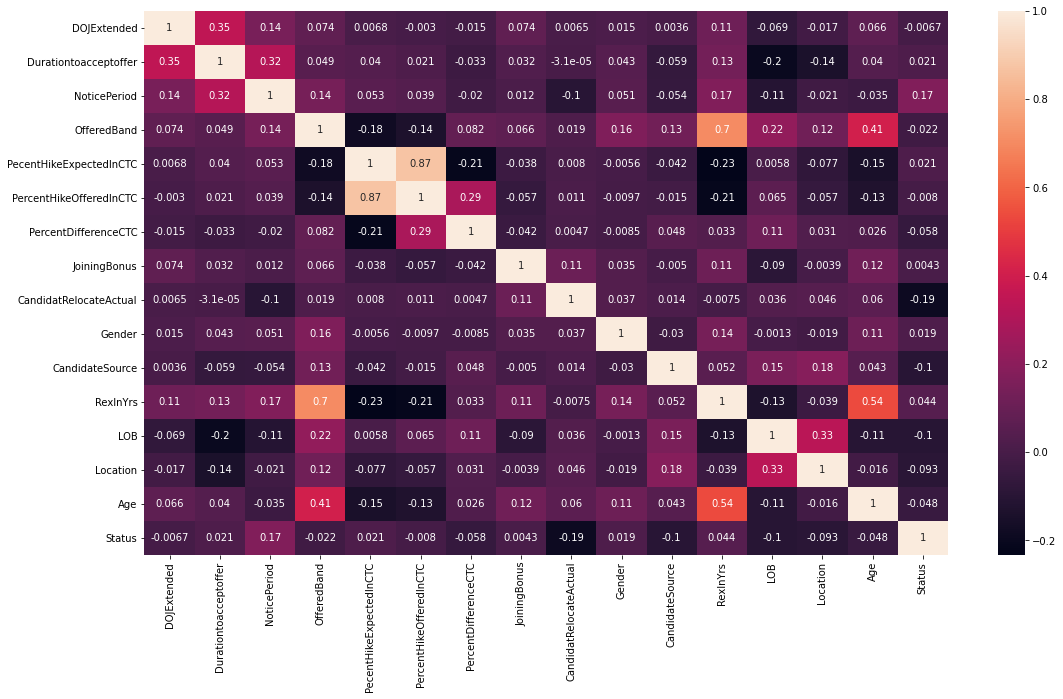

In [171]:
corr = corr_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()


From this heatmap we can see that RexInYrs and age has highest collinearity 

Seprating our dependent and independent variable for model training .

In [172]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [173]:
X.head()

,DOJExtended,Durationtoacceptoffer,NoticePeriod,OfferedBand,PecentHikeExpectedInCTC,PercentHikeOfferedInCTC,PercentDifferenceCTC,JoiningBonus,CandidatRelocateActual,Gender,CandidateSource,RexInYrs,LOB,Location,Age
2,0,3,45,2,42.84,42.84,0.0,0,0,1,0,4,7,8,27
3,0,26,30,2,42.84,42.84,0.0,0,0,1,2,4,7,8,34
5,1,17,30,1,42.83,42.83,0.0,0,0,1,2,2,7,8,34
6,1,37,30,2,31.58,31.58,0.0,0,0,1,2,7,7,8,32
11,0,3,0,2,28.21,37.18,7.0,0,0,1,2,7,7,2,34


In [174]:
from sklearn.preprocessing import scale
X = scale(X)

Spliting our dataset for train and test .

In [175]:
from sklearn.model_selection import train_test_split

We are spliting out data into 8:2 ratio . In trainig we are using our 80% data and in testing we are using our 20% data .

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 30)

importing Random Forest Classifier for our model .

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
model = RandomForestClassifier()

# Training our model .

In [179]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [180]:
predict = model.predict(X_test)

In [181]:
df1.columns

Index(['DOJExtended', 'Durationtoacceptoffer', 'NoticePeriod', 'OfferedBand',
       'PecentHikeExpectedInCTC', 'PercentHikeOfferedInCTC',
       'PercentDifferenceCTC', 'JoiningBonus', 'CandidatRelocateActual',
       'Gender', 'CandidateSource', 'RexInYrs', 'LOB', 'Location', 'Age',
       'Status'],
      dtype='object')

In [182]:
data = ['']

In [183]:
print(predict)

[0 0 0 ... 1 0 0]


In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix

## Accuracy Score

In [185]:
accuracy_score(y_test,predict)

0.8254189944134078

So we have build our model having 82.54 % accuracy score

In [186]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model
pred = clf_ridge.predict(X_train)

In [187]:
confusion_matrix(y_train, pred)
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.8289106145251397

after trying other model we get almost the same accuracy